Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00        73

    accuracy                           1.00      1461
   macro avg       1.00      1.00      1.00      1461
weighted avg       1.00      1.00      1.00      1461



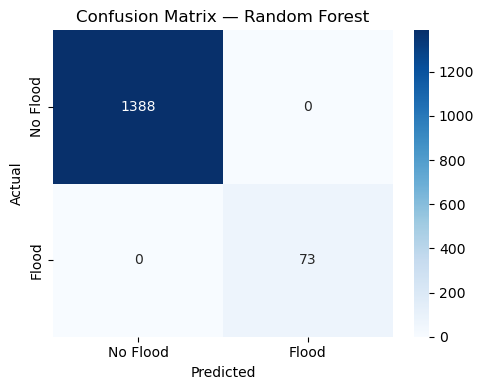

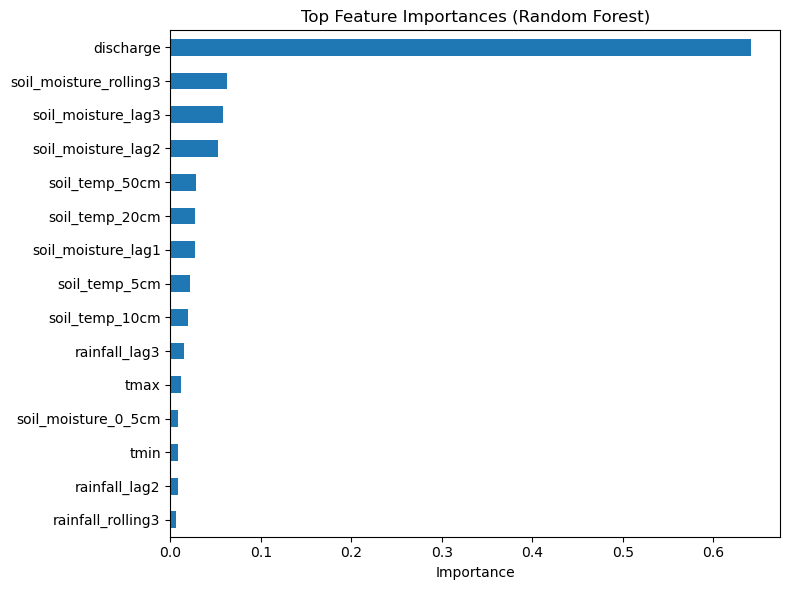

ROC-AUC: 1.000


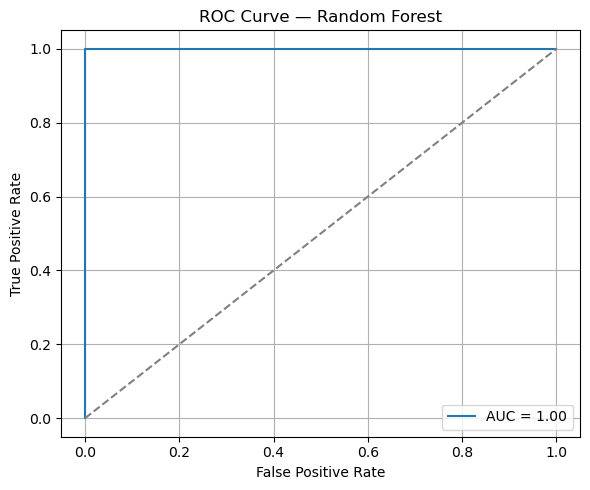

Cross-Validation F1 Scores: [1.         0.99310345 1.         0.98611111 1.        ]
Mean F1 Score: 0.9958429118773946


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# data loading part ---------------------
df = pd.read_csv("flood_model_lagged.csv", parse_dates=["date"])
X = df.drop(columns=["date", "flood"])
y = df["flood"]

# the part of Train/Test Split -------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --------Training the Random Forest mmodel------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions of flood vs non flood of model----------
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# the part of Classification Report ----
print("Random Forest Report:\n", classification_report(y_test, y_pred, digits=2))

#  Confusion Matrix part  ---------------------------------------------------------------------------------------
#########################
plt.figure(figsize=(5, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Flood", "Flood"],
    yticklabels=["No Flood", "Flood"]
)
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# the part of Feature Importances ---------------------------------------------
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
importances.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

#  ROC Curve plot part----------------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.3f}")

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Cross validation part-----------------####-------------------------
scores = cross_val_score(rf, X, y, cv=5, scoring="f1")
print("Cross-Validation F1 Scores:", scores)
print("Mean F1 Score:", scores.mean())

# ------------------ Saving the Model as random_forest_flood_model.pkl--------------------------------
joblib.dump(rf, "random_forest_flood_model.pkl")
print("Model saved: random_forest_flood_model.pkl")
